# Criação de Dados para teste

Dados de treino

<Axes: xlabel='x', ylabel='y'>

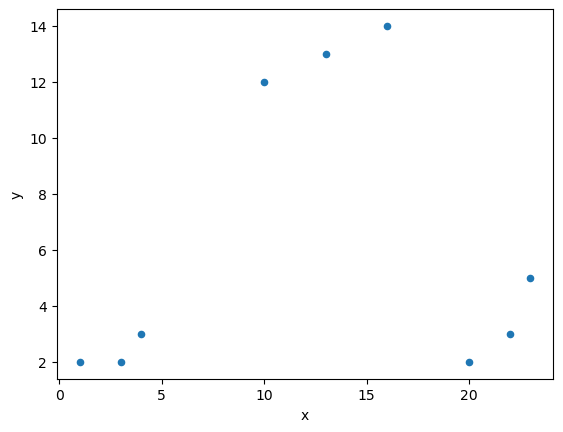

In [54]:
import pandas as pd

dados = [[1,2],
        [3,2],
        [4,3],
        [10,12],
        [13,13],
        [16,14],
        [20,2],
        [22,3],
        [23,5]]
dados
df = pd.DataFrame(dados, columns=['x','y'])
df.plot(x='x', y='y', kind='scatter')

Dados de teste

<Axes: xlabel='x', ylabel='y'>

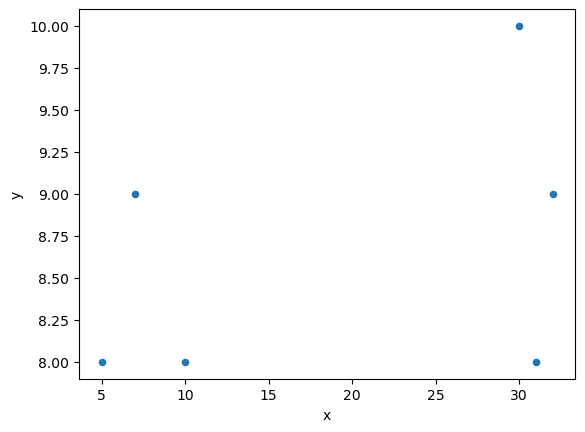

In [55]:
dados_teste = [[5,8],
              [7,9],
              [10,8],
              [30,10],
              [31,8],
              [32,9]]
df_teste = pd.DataFrame(dados_teste, columns=['x','y']) 
df_teste.plot(x='x', y='y', kind='scatter')

Vendo dados juntos

<Axes: xlabel='x', ylabel='y'>

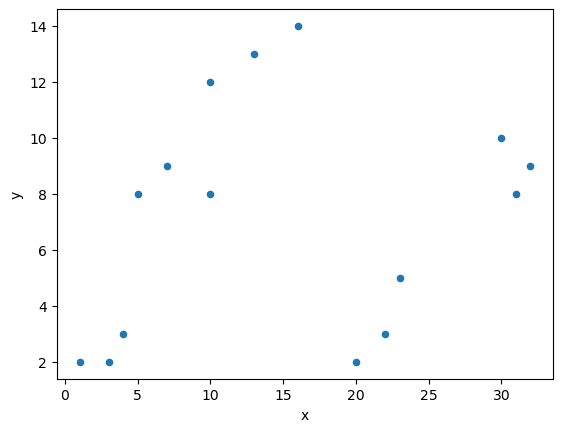

In [56]:
df_juntos = pd.merge(df, df_teste, how = 'outer')
df_juntos.plot(x='x', y='y', kind='scatter')   

# Normalização de dados
- A fazer

Normalizar os dados para que fiquem na mesma distribuição.

# Aplicando algoritmos de agrupamento de dados

## K-means

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
rotulos_k_means = kmeans.labels_
rotulos_k_means

c:\Users\migue\miniconda3\envs\spyder-env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 2, 2, 2, 1, 1, 1])

Mostrando dados agrupados pelo K-means

<Axes: xlabel='x', ylabel='y'>

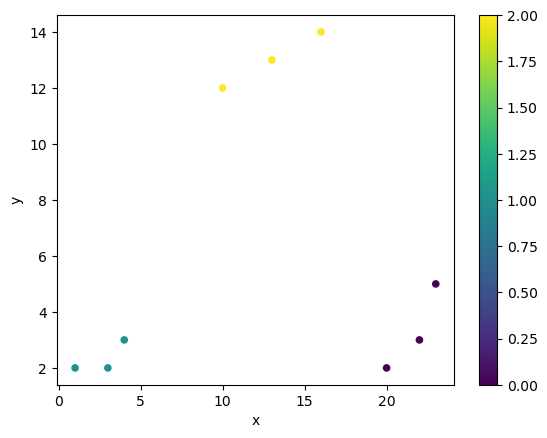

In [58]:
df.plot(x='x', y='y', kind='scatter', c=rotulos_k_means, cmap='viridis')

Predict do K-means

Ele serve para prever a qual cluster novos dados pertencem, usando os centroides já calculados.
Porém adiciona todos os dados a algum cluster, não diferenciando outliers.

In [59]:
rotulos_k_means_predict = kmeans.predict(df_teste)
rotulos_k_means_predict = pd.DataFrame(rotulos_k_means_predict, columns=['rotulos'])
rotulos_k_means = pd.DataFrame(rotulos_k_means, columns=['rotulos'])
rotulos_k_means_plot = pd.concat([rotulos_k_means, rotulos_k_means_predict])['rotulos'].values
rotulos_k_means_plot


array([1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0])

<Axes: xlabel='x', ylabel='y'>

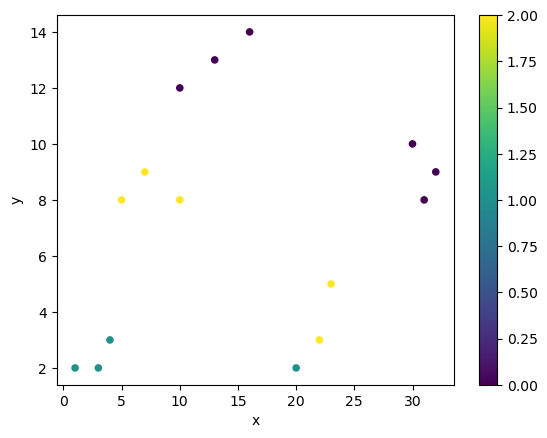

In [60]:
df_juntos.plot(x='x', y='y', kind='scatter', c=rotulos_k_means_plot, cmap='viridis')

## DBSCAN

In [61]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(df)
rotulos_dbscan = dbscan.labels_
rotulos_dbscan

array([ 0,  0,  0, -1, -1, -1,  1,  1,  1], dtype=int64)

Mostrando os dados agrupados pelo DBSCAN

<Axes: xlabel='x', ylabel='y'>

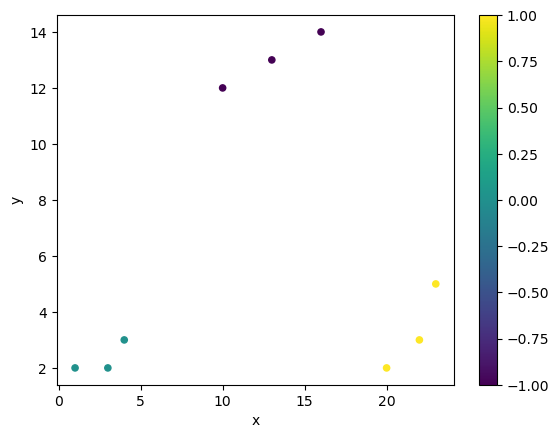

In [62]:
df.plot(x='x', y='y', kind='scatter', c=rotulos_dbscan, cmap='viridis')

## Por que o DBSCAN não tem predict?
O DBSCAN não pode prever clusters para novos pontos porque:

1) Ele não define fronteiras ou centroides claros como o K-Means.
2) Os clusters dependem diretamente dos dados usados durante o ajuste, e adicionar novos pontos pode alterar o agrupamento existente.

Se for necessário classificar novos pontos após o ajuste, você teria que:

- Ajustar novamente o modelo, incluindo os novos dados.

Então ele precisa treinar novamente toda vez que receber novos dados, assim ele retorna os novos clusters para os novos dados.
1) fit = Treinar
2) predict = Prever e Retornar


Predict do DBSCAN

In [63]:
dbscan.fit_predict(df_teste)

array([ 0,  0, -1,  1,  1,  1], dtype=int64)

Precisamos treinar com todos os dados, os originais e os novos.

In [64]:
rotulos_dbscan_fit_predict = dbscan.fit_predict(df_juntos)
rotulos_dbscan_fit_predict

array([ 0,  0,  0,  1,  1, -1, -1, -1, -1,  2,  2,  2,  3,  3,  3],
      dtype=int64)

Mostrando os dados agrupados pelo DBSCAN após o *fit_predict*

<Axes: xlabel='x', ylabel='y'>

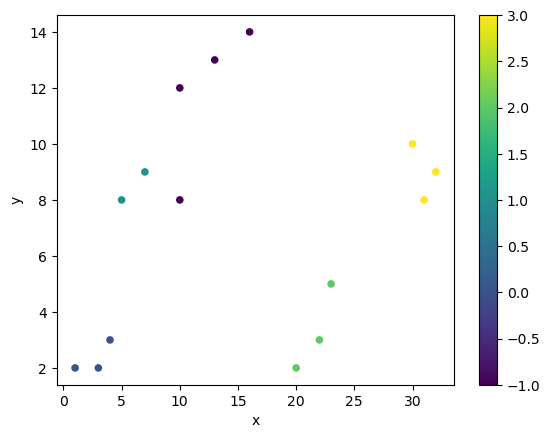

In [65]:
df_juntos.plot(x='x', y='y', kind='scatter', c=rotulos_dbscan_fit_predict, cmap='viridis')

Podemos ver a diferença de agrupamento de dados do DBSCAN para o K means nesse gráfico, como o calculo baseado em densidade ao invés de numero de clusters faz toda a diferença.

# Modelos de previsão

## Mult Layer Perceptron (Redes Neurais Artificiais)

Entradas de treino
- Posições padrões

In [66]:
dados_train = df
dados_train

,x,y
0,1,2
1,3,2
2,4,3
3,10,12
4,13,13
5,16,14
6,20,2
7,22,3
8,23,5


Targets 
- Rotulos criados - K-means e DBSCAN

In [97]:
max_rotulos = len(pd.Series(rotulos_k_means).unique())
target_kmeans = []
target_kmeans

[]